In [1]:
# Install gensim - pip install gensim
import nltk
import urllib
import bs4 as bs
import re

from gensim.models import Word2Vec

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import pandas as pd
import numpy as np

In [2]:
# link to the wikipedia of the president Senegal
raw_html = urllib.request.urlopen('https://en.wikipedia.org/wiki/Macky_Sall')  
raw_html = raw_html.read()
bs_html = bs.BeautifulSoup(raw_html,'lxml')

# Fetching the data
text = ""
for paragraph in bs_html.find_all('p'):
    text += paragraph.text

In [3]:
# check all contractions
cont = re.findall("([a-zA-Z]+\'[a-zA-Z]+)", text)
print(cont)

["Sall's", "Wade's", "Wade's", "Wade's", "Wade's", "Karim's", "Sall's", "Sall's", "Party's", "Sall's", "Sall's", "Fatick's", "Coalition's", "Wade's", "N'Dour", "Sall's", "latter's", "Wade's", "predecessor's", "Senegal's", "Senegal's", "Sall's", "Sall's", "Sall's"]


### Preprocess data

In [4]:
import spacy
sp = spacy.load('en_core_web_sm')

def lemmatizer(sentence):
    spacy_sentence = sp(sentence)
    tokens = []
    for word in spacy_sentence:
        tokens.append(word.lemma_)
    return tokens

In [5]:
# print first 200 characters
text[:200]

'\nMacky Sall (born 11 December 1961[1]) is a Senegalese politician who has been President of Senegal since April 2012. He was re-elected President in the first round voting in February 2019 Senegalese '

In [6]:
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',text) # replace all consecutive figures within square brackets
text = re.sub(r'\s+',' ',text) # remove two or more whitespaces with a single whitespace
text = text.lower() # convert all text to loser cases

#text = re.sub(r'\d',' ',text) # replace single digits with space
text = re.sub(r'\s+',' ',text) 

In [7]:
# print first 200 characters
text[:200]

' macky sall (born 11 december 1961 ) is a senegalese politician who has been president of senegal since april 2012. he was re-elected president in the first round voting in february 2019 senegalese pr'

In [8]:
# check first few sentences
sentences = nltk.sent_tokenize(text)
for i, sentence in enumerate(sentences[:3]):
    print(sentence)
    print(sentence.strip())
    print()

 macky sall (born 11 december 1961 ) is a senegalese politician who has been president of senegal since april 2012. he was re-elected president in the first round voting in february 2019 senegalese presidential election.
macky sall (born 11 december 1961 ) is a senegalese politician who has been president of senegal since april 2012. he was re-elected president in the first round voting in february 2019 senegalese presidential election.

under president abdoulaye wade, sall was prime minister of senegal from july 2004 to june 2007 and president of the national assembly from june 2007 to november 2008. he was the mayor of fatick from 2002 to 2008 and held that post again from 2009 to 2012. sall was a long-time member of the senegalese democratic party (pds).
under president abdoulaye wade, sall was prime minister of senegal from july 2004 to june 2007 and president of the national assembly from june 2007 to november 2008. he was the mayor of fatick from 2002 to 2008 and held that post a

### train word2vec

In [9]:
sentences = [lemmatizer(sentence.strip()) for sentence in sentences]

# Training the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
print ("# of words", len(model.wv.key_to_index))

# of words 789


In [10]:
vector = model.wv['french']  # get numpy vector of a word
#print(vector)

In [11]:
sims = model.wv.most_similar('french', topn=10)  # get other similar words
print(sims)

[('on', 0.38297510147094727), ('for', 0.37589940428733826), ('national', 0.3647320866584778), ('someone', 0.36067286133766174), (',', 0.3467370271682739), ('(', 0.3455165922641754), ('year', 0.3410138189792633), ('the', 0.3278810977935791), ('and', 0.3239421248435974), ('defeat', 0.32362884283065796)]


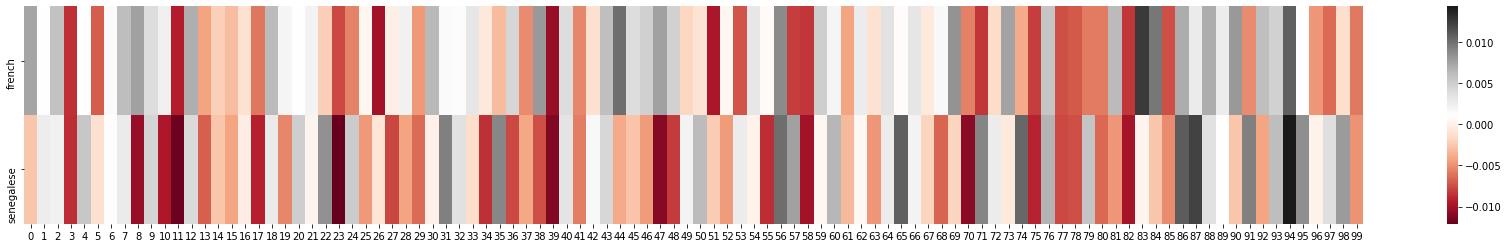

In [12]:
vector = model.wv['senegalese']  # get numpy vector of a word
plt.figure(figsize=(30,4))
df = pd.DataFrame({'french': model.wv['french'],
                   'senegalese': model.wv['senegalese']
                  })
sns.heatmap(df.T, fmt="g", cmap='RdGy')
plt.show()